### 회귀
- 소득이 증가하면 소비도 증가, 어떤 변수가 다른 변수에 영향을 준다면 두 변수 사이에 선형관계가 있다고 할 수 있음
- 두 변수 사이에 일대일로 대응되는 확률적, 통계적 상관성을 찾는 알고리즘을 Simple Linear Regression이라고 함
- 변수 X, Y에 대한 정보를 가지고 일차 방정식 계수 a,b를 찾는 과정이 단순회귀분석 알고리즘

### 회귀 평가 지표
- MAE : 실제값과 예측값의 차이를 절대값으로 변환해 평균한 것
- MSE : 실제값과 예측값의 차이를 제곱해 평균한 것
- RMSE : MSE에 루트를 씌운 것(실제 오류 평균보다 커지는 것을 보정)
- R square : 분산 기반으로 예측 성능을 평가. 실제값의 분산 대비 예측값의 분산 비율을 지표로 함
    - 1에 가까울 수록 예측 정확도가 높음. 예측값 Variance / 실제값 Variance</br></br>
    
- MAE, MSE, RMSE 오차의 정도를 본 것 -> 오차니까 작을수록 좋음
- R square은 높을수록 좋음 -> 설명력이 좋다

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel('../m2_분석라이브러리활용/pandas/dataset/auto-mpg.xlsx')
ndf = df[['mpg','cylinders','horsepower','weight']]
ndf.head()

,mpg,cylinders,horsepower,weight
0,18.0,8,130,3504
1,15.0,8,165,3693
2,18.0,8,150,3436
3,16.0,8,150,3433
4,17.0,8,140,3449


In [6]:
# unique()는 데이터에 고유값들이 어떠한 종류들이 있는지 알고 싶을때 사용하는 함수입니다.
# horsepower 열의 고유값 확인
ndf.horsepower.unique()

array([130, 165, 150, 140, 198, 220, 215, 225, 190, 170, 160, 95, 97, 85,
       88, 46, 87, 90, 113, 200, 210, 193, '?', 100, 105, 175, 153, 180,
       110, 72, 86, 70, 76, 65, 69, 60, 80, 54, 208, 155, 112, 92, 145,
       137, 158, 167, 94, 107, 230, 49, 75, 91, 122, 67, 83, 78, 52, 61,
       93, 148, 129, 96, 71, 98, 115, 53, 81, 79, 120, 152, 102, 108, 68,
       58, 149, 89, 63, 48, 66, 139, 103, 125, 133, 138, 135, 142, 77, 62,
       132, 84, 64, 74, 116, 82], dtype=object)

In [7]:
ndf.horsepower[ndf.horsepower=='?'] = np.nan  # ? -> NAN 으로 값 변경
ndf.dropna(subset=['horsepower'], axis=0, inplace=True) # 누락데이터 행을 삭제
ndf.horsepower = ndf.horsepower.astype('float') # float로 type 변경
ndf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   mpg         392 non-null    float64
 1   cylinders   392 non-null    int64  
 2   horsepower  392 non-null    float64
 3   weight      392 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 15.3 KB


In [8]:
# pkl 형태로 내보내기
ndf.to_pickle('./dataset/auto-mpg.pkl')

In [9]:
X = ndf[['weight']] #독립변수
y = ndf['mpg'] #종속변수

# 학습용 data와 검증용 data 만들어줌
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.3,
                                                    random_state =11)

<AxesSubplot:title={'center':'Regplot'}, xlabel='weight', ylabel='mpg'>

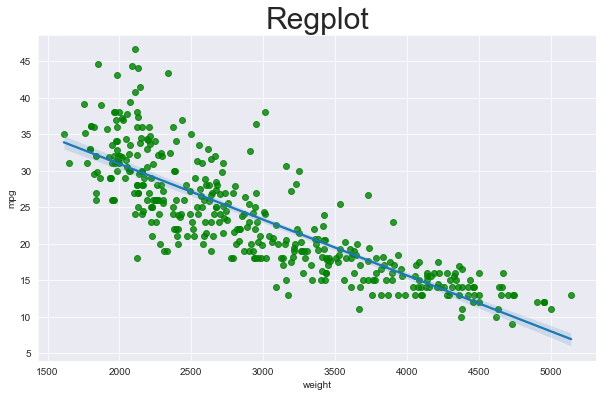

In [15]:
sns.set_style('darkgrid')
fig, axes = plt.subplots(1,1, figsize=(10,6))
plt.title('Regplot', fontsize=30)
sns.regplot(ax=axes, x='weight', y='mpg', data = ndf, scatter_kws={'color':'green'})
# 각각 점들과 회귀식(파란것) 사이의 오차의 합을 최소화 하는것이 회귀식을 만드는 원리
# 기계 학습의 원리란?
# x값과 y값을 제공해준다 -> 계속 학습하면서 가장 최적의 회귀선 (기울기) 구하기 -> 
# y=ax+b 에서 a와 b를 구해줌 -> 회귀선이 구해짐

In [16]:
from sklearn.linear_model import LinearRegression
# fit_transfrom 은 변환할때
# fit는 학습
lr = LinearRegression()
lr.fit(X_train,y_train) # 학습 됨
# 이제 예측 할 수 있음
y_preds = lr.predict(X_test)

In [18]:
X_test # weight 값을 집어 넣으면

,weight
240,2190
390,2665
391,2370
236,2755
222,4060
...,...
190,4215
152,3264
125,3102
105,4654


In [19]:
y_preds  # 예측값 -> 파란색 회귀식에 의해 예측값을 구함 

array([29.27985295, 25.65957977, 27.90795996, 24.97363328, 15.02740907,
       16.26973439, 14.22713816, 25.60622838, 31.37580058, 25.24039025,
       29.77525875, 16.47551834, 12.13119053, 30.34688083, 18.19038459,
       30.23255642, 27.83174368, 21.96309032, 10.62210824, 27.64120299,
       24.7068763 , 17.18432972, 27.8927167 , 21.33049522, 10.15718895,
       29.18839342, 27.71741926, 29.05882575, 18.38092528, 20.36254849,
       31.20812477, 17.58065437,  7.88594388, 31.20812477, 14.8978414 ,
       26.15498558, 14.41005723, 23.525524  , 29.42466388, 24.63066003,
       29.00547435, 21.9021173 , 30.33925921, 30.8041785 , 26.04066116,
       29.52374504, 14.31097606, 30.70509734, 15.9420044 , 28.17471693,
       26.80282393, 19.86714269, 28.06039251, 24.4020112 , 29.88958317,
       27.45066229, 20.41589989, 21.63536032, 21.50579265, 23.0834696 ,
       15.16459837, 31.07093547, 30.95661105, 20.32444035,  8.20605224,
       24.82882235, 25.62147163, 14.03659747, 26.11687744, 27.42

In [8]:
# 회귀 계수
# weight와 mpg의 단위가 다르기 때문에 -> -0.00762163 -> 그래서 표준화, 정규화 해줘야함
print(f'기울기 : {lr.coef_}')
print(f'절편 : {lr.intercept_}')

기울기 : [-0.00762163]
절편 : 45.97121770475769


In [20]:
# 회귀방정식으로 모델을 구함 -> 그 모델을 평가  -> (오차율)회귀식과 실제 데이터 값 사이의 오차를 최소화함을 목표
# 오차율로 충분치 않음 -> 실제 변화에 대한 예측의 설명력을 구해줌 -> 분산 기반으로 한 R square
# sklearn에서는 루트 mean_squared_error는 없음 - > mean_squared_error를 구해서 넘파이써서 루트씌어줌
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test,y_preds) # 테스트 데이터, 예측 데이터 사이의 오차 구하기
rmse = np.sqrt(mse) # mse에 루트 씌어줌
r_square = r2_score(y_test,y_preds) 
print(f'mse: {mse}, rmse: {rmse}, r_square: {r_square}') 
# 설명력 r_square ->  이 모델이 실제의 64%정도를 설명한다

mse: 22.168955157340807, rmse: 4.70839199274453, r_square: 0.6410608728212728


<AxesSubplot:xlabel='mpg', ylabel='Density'>

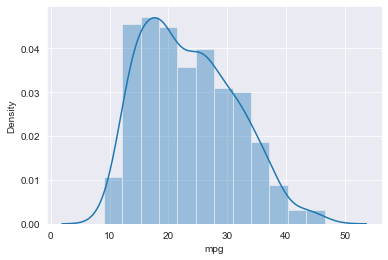

In [22]:
# 실제y값
sns.distplot(y,kde=True)

<AxesSubplot:ylabel='Density'>

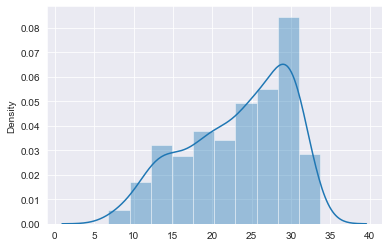

In [23]:
# 회귀식에 의해서 예측한 y값
y_hat = lr.predict(X) # 
sns.distplot(y_hat,kde=True)

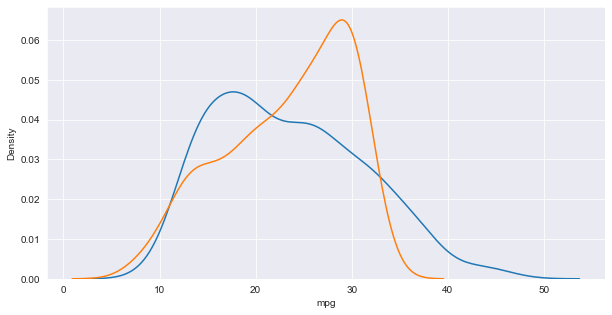

In [12]:
# 실제로 단순회귀는 많이 쓰이지 않음 why? -> 세상사에 단순한문제는 많지 않기 때문
# 설명력 r_square 0.6밖에 안됨으로 -> 차이가 많이남
plt.figure(figsize=(10,5))
ax1 = sns.distplot(y, hist=False, label='y')
ax2 = sns.distplot(y_hat, hist=False, label='y_hat')
plt.show()
plt.close()

### 다항 회귀분석
- 직선보다 곡선으로 설명하는 것이 적합할 경우 다항 함수를 사용하면 복잡한 곡선 형태의 회귀선을 표현할 수 있음
- 2차 함수 이상의 다항 함수를 이용하여 두 변수간의 선형관계를 설명하는 알고리즘
- 다항회귀도 선형회귀임. 선형/비선형 회귀를 나누는 기준은 회귀계수가 선형/비선형인지에 따르며 독립변수의 선형/비선형 여부와는 무관함

In [50]:
import pandas as pd
df = pd.read_excel("./dataset/auto-mpg.xlsx")
ndf = df[['mpg','cylinders','horsepower','weight']]
ndf.head()

,mpg,cylinders,horsepower,weight
0,18.0,8,130,3504
1,15.0,8,165,3693
2,18.0,8,150,3436
3,16.0,8,150,3433
4,17.0,8,140,3449


In [51]:
X = ndf[['weight']]
y = ndf['mpg']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y,
                                                   test_size = 0.3,
                                                   random_state = 10)

In [52]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures # 다항식 변환

In [53]:
poly = PolynomialFeatures(degree=2) # 객체 생성, degree=2 -> 2차원으로 
X_train_poly = poly.fit_transform(X_train) # X_train을 변환

# 2차항으로 바꿧는데 왜 3이 되었을까? -> 하나는 절편 x자승 x절편 -> 3개 나옴
print(X_train.shape)
print(X_train_poly.shape)

(278, 1)
(278, 3)


In [54]:
X_train_poly[:5]

array([[1.0000000e+00, 2.7200000e+03, 7.3984000e+06],
       [1.0000000e+00, 4.6150000e+03, 2.1298225e+07],
       [1.0000000e+00, 2.1350000e+03, 4.5582250e+06],
       [1.0000000e+00, 3.6200000e+03, 1.3104400e+07],
       [1.0000000e+00, 2.4510000e+03, 6.0074010e+06]])

In [35]:
# 차수 확인
poly.get_feature_names()

['1', 'x0', 'x0^2']

In [55]:
# 학습시킬때 X_train_poly사용

pr = LinearRegression() # 객체 생성
pr.fit(X_train_poly, y_train) # 학습시켜줌

X_test_poly = poly.fit_transform(X_test) # X_test도 차수 변환
r_square = pr.score(X_test_poly, y_test) 
r_square

0.72554701541758

In [56]:
print(pr.coef_) # 계수
print(pr.intercept_) 

[ 0.00000000e+00 -1.69114181e-02  1.43451114e-06]
60.405921782601645


In [ ]:
# 2차로 축소한것 시각화
# 직선보다 곡선으로 하는것이 더 잘 반영된다
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

y_hat_test = pr.predict(X_test_poly)
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1,1,1)
ax.plot(X_train,y_train,'o',label='Train Data')
ax.plot(X_test,y_hat_test,'r+', label='Predicted Value')
ax.legend(loc='best')
plt.xlabel('weight')
plt.ylabel('mpg')
plt.show()
plt.close()

In [ ]:
import numpy as np
np.random.rand(100,1) # 0 ~ 1 균일분포

In [43]:
# [과제] X 데이터를 X_poly 데이터셋으로 변환하여 2차함수로 만들어진 데이터셋을 예측하고 시각화하세요
import numpy as np
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m,1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m,1)

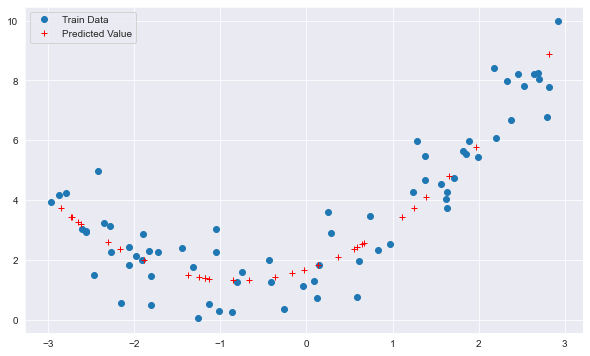

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression


X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state = 11)

# 2차 다항식으로 바꿈
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)

# 훈련 및 학습
lr = LinearRegression()
lr.fit(X_train_poly,y_train)
y_preds = lr.predict(X_test_poly)

# 시각화
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(1,1,1)
ax.plot(X_train,y_train,'o',label='Train Data')
ax.plot(X_test,y_preds,'r+', label='Predicted Value')
ax.legend(loc='best')
plt.show()
plt.close()

In [45]:
poly.get_feature_names()

['1', 'x0', 'x0^2']

### 다중 회귀분석
- 여러 개의 독립변수가 종속변수에 영향을 주고 선형관계를 갖는 경우에 다중회귀분석을 사용
- 다중 회귀분석 알고리즘은 각 독립 변수의 계수와 상수항에 적절한 값들을 찾아서 모형을 완성

In [46]:
import pandas as pd
df = pd.read_pickle('./dataset/auto-mpg.pkl')
df.head()

,mpg,cylinders,horsepower,weight
0,18.0,8,130.0,3504
1,15.0,8,165.0,3693
2,18.0,8,150.0,3436
3,16.0,8,150.0,3433
4,17.0,8,140.0,3449


In [47]:
X = df.drop('mpg',axis=1) # cylinders, horespower, weight 독립변수
y =df['mpg'] # 종속변수

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

lr = LinearRegression() # 객체 생성
lr.fit(X_train, y_train) # X_train은 변수가 3개

y_preds = lr.predict(X_test) # 예측
r_square = lr.score(X_test,y_test)
round(r_square,4)

0.6939

In [ ]:
# Q. mse, rmse, r_square(r2_score) 기울기, 절편

In [ ]:
# [과제] y_test, y_hat 을 하나의 그래프로 비교하여 시각화

[과제] 아래 Boston 데이터 셋으로 보스턴 주택 가격 예측 모델을 만들고 평가하세요.

In [48]:
from sklearn.datasets import load_boston

boston = load_boston()
boston_df = pd.DataFrame(boston.data, columns = boston.feature_names)
boston_df['PRICE'] = boston.target
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
